## Installing Dataset from Kaggle 
https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download spscientist/students-performance-in-exams

  0% 0.00/8.70k [00:00<?, ?B/s]
100% 8.70k/8.70k [00:00<00:00, 5.48MB/s]


In [ ]:
!unzip students-performance-in-exams.zip

Archive:  students-performance-in-exams.zip
replace StudentsPerformance.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: StudentsPerformance.csv  


## Importing libraries 

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Reading Dataset

In [ ]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.shape

(1000, 8)

## Descriptive Statistics

In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##Data Cleaning

1.Checking the Null Values

In [ ]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

No null values in the dataset 

 Checking number of unique values in dataset

In [ ]:
df.select_dtypes("object").nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

## EDA

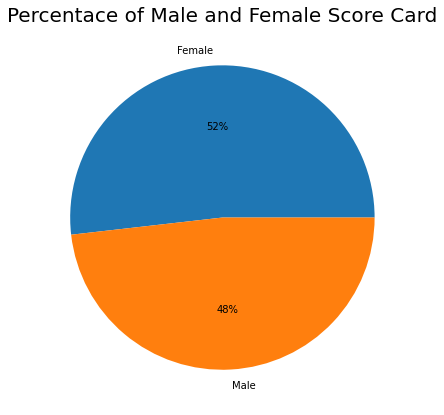

In [ ]:
plt.figure(figsize=[10,7])
plt.title("Percentace of Male and Female Score Card", fontsize=20)

val = df.gender.value_counts()

plt.pie(data=df, x=val, autopct="%1.0f%%", labels=["Female","Male"])
plt.show()

##Conclusion
Out of the 100%; 52 percantage are female and 48 percentage are male candidates.

**EDA on Categorical variables**

In [ ]:
# Getting the list of all categorical variables

cat_var = df.select_dtypes(include="object").columns
cat_var

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

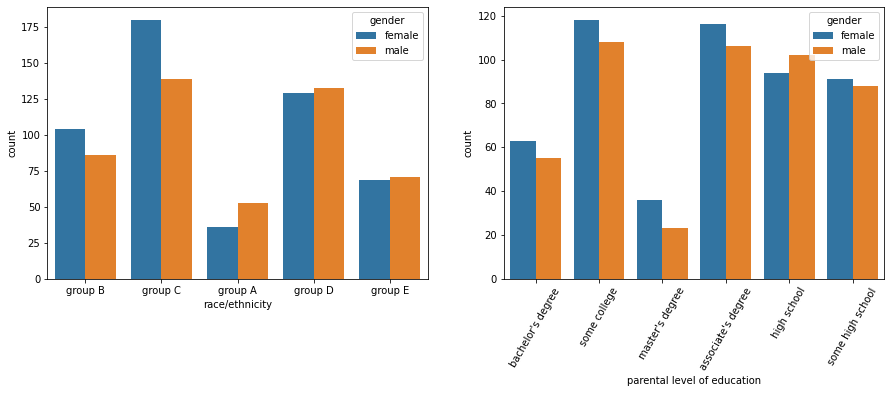

In [ ]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
sns.countplot(data=df, x="race/ethnicity", hue="gender")

plt.subplot(1,2,2)
sns.countplot(data=df, x="parental level of education", hue="gender")
plt.xticks(rotation=60)

plt.show()

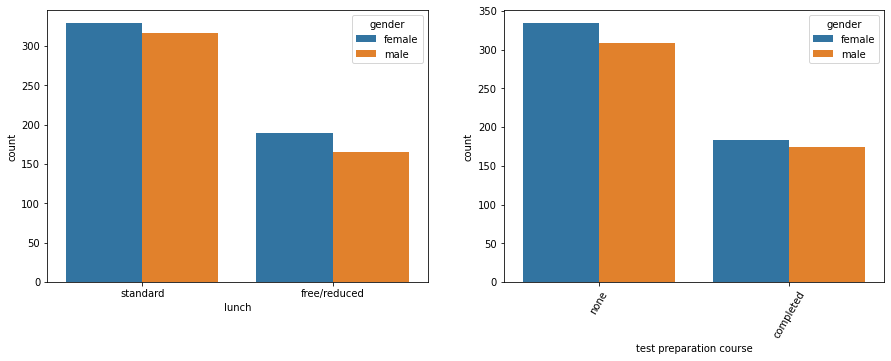

In [ ]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
sns.countplot(data=df, x="lunch", hue="gender")

plt.subplot(1,2,2)
sns.countplot(data=df, x="test preparation course", hue="gender")
plt.xticks(rotation=60)

plt.show()

# Q1 . Gender Vs Marks

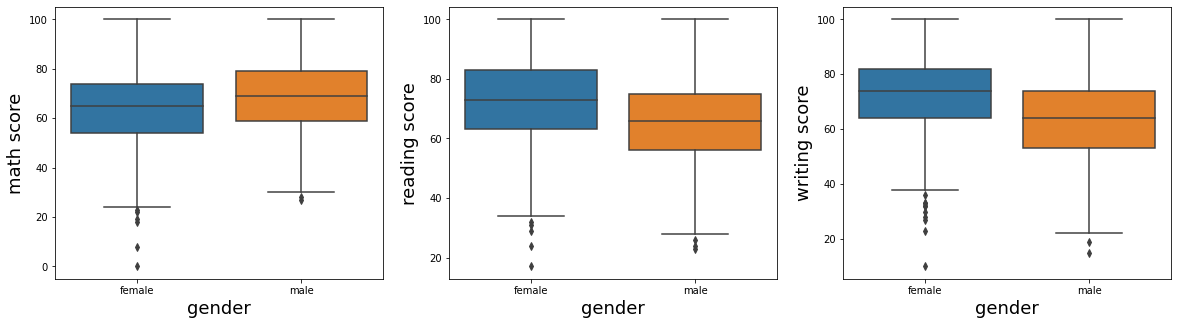

In [31]:
plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
sns.boxplot(data=df, x="gender", y="math score")

plt.subplot(1,3,2)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
sns.boxplot(data=df, x="gender", y="reading score")

plt.subplot(1,3,3)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
sns.boxplot(data=df, x="gender", y="writing score")

plt.show()

##Conclusion
1. Math Score - Males have scored maximum score than Female.
2. Females have scored better in both reading and writing

# Q2. Parental Level of Education vs Marks

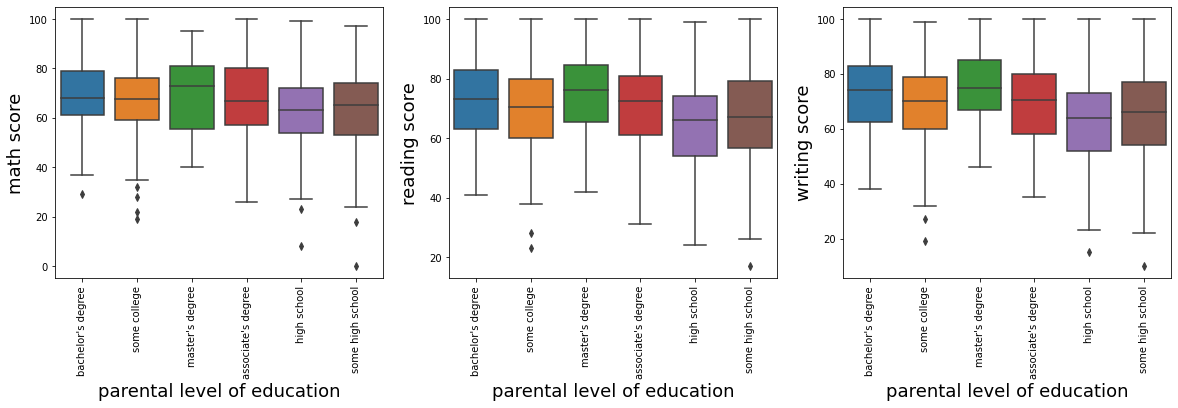

In [32]:
plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.xticks(rotation=90)
sns.boxplot(data=df, x="parental level of education", y="math score")

plt.subplot(1,3,2)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.xticks(rotation=90)
sns.boxplot(data=df, x="parental level of education", y="reading score")

plt.subplot(1,3,3)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.xticks(rotation=90)
sns.boxplot(data=df, x="parental level of education", y="writing score")

plt.show()

##Conclusion
Childrens whose parents have master degree has performed better

#Q3. Test Preparation Course vs Score

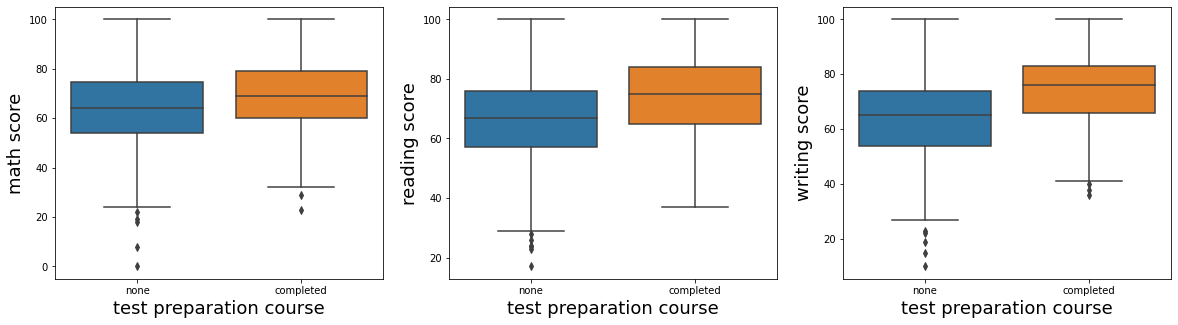

In [33]:
plt.figure(figsize=[20,5])

plt.subplot(1,3,1)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
sns.boxplot(data=df, x="test preparation course", y="math score")

plt.subplot(1,3,2)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
sns.boxplot(data=df, x="test preparation course", y="reading score")

plt.subplot(1,3,3)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
sns.boxplot(data=df, x="test preparation course", y="writing score")

plt.show()

#Conclusion
Form the above we can clearly see that the students who have completed their test prepration course have performed better.